In [52]:
import pandas as pd
import datetime
from scapy.all import *

import matplotlib.pyplot as plt

%pylab inline
#%matplotlib notebook 
pylab.rcParams['figure.figsize'] = (16, 6)


pd.__version__

Populating the interactive namespace from numpy and matplotlib


u'0.20.2'

In [53]:
packetList = rdpcap(os.getcwd() + "/data/" + "background.pcap") #  Read PCAP file into list of packets

In [54]:
plist = []
for pkt in packetList:
    if DNSQR in pkt and pkt.dport == 53:
        qtime = datetime.datetime.fromtimestamp(float(pkt.time)).strftime('%Y-%m-%d %H:%M:%S.%f')
        #qstring = pkt.qd.qname.decode('ascii')
        qstring = pkt.qd.qname
        
        plist.append((qtime, qstring))

df = pd.DataFrame(plist, columns=['Time', 'Query'])


In [55]:
print plist[0]
df.head()

('2014-11-23 18:28:54.306841', 'www.aircrack-ng.org.')


,Time,Query
0,2014-11-23 18:28:54.306841,www.aircrack-ng.org.
1,2014-11-23 18:28:54.306941,www.aircrack-ng.org.
2,2014-11-23 18:28:54.306986,www.aircrack-ng.org.
3,2014-11-23 18:28:54.815945,www.aircrack-ng.org.
4,2014-11-23 18:28:54.816041,www.aircrack-ng.org.


In [56]:
df.index = pd.to_datetime(df.Time)
df.head()

,Time,Query
Time,,
2014-11-23 18:28:54.306841,2014-11-23 18:28:54.306841,www.aircrack-ng.org.
2014-11-23 18:28:54.306941,2014-11-23 18:28:54.306941,www.aircrack-ng.org.
2014-11-23 18:28:54.306986,2014-11-23 18:28:54.306986,www.aircrack-ng.org.
2014-11-23 18:28:54.815945,2014-11-23 18:28:54.815945,www.aircrack-ng.org.
2014-11-23 18:28:54.816041,2014-11-23 18:28:54.816041,www.aircrack-ng.org.


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: modifications to a property of a datetimelike object are not supported and are discarded. Change values on the original.
  


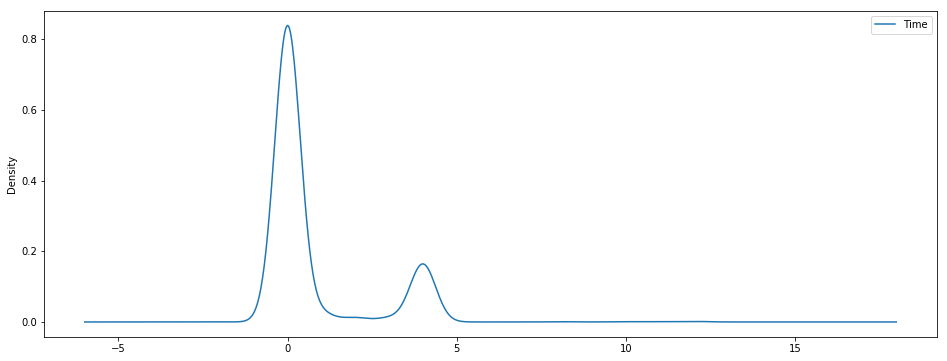

In [58]:
# Is there any pattern or periodicity to the sophosxl queries?
#day = dns_queries['2017-06-19 15:00:00' : '2017-06-19 16:00:00']
#day = dns_queries[dns_queries.LD2.str.match('mooo')]
#print day.head()

ser_diff = df.index.to_series().diff()
x = ser_diff.dt.seconds
x[0] = 0
data = x.to_frame()
#plt.hist(x, bins=100)
ax = data.plot.kde()
#ax.set_xlim(0)